#### Pridicting Heart Disease by using Neural Networks.

**About Dataset**

The dataset contains the following features:

- age(in years)
- sex: (1 = male; 0 = female)
- cp: chest pain type
- trestbps: resting blood pressure (in mm Hg on admission to the hospital)
- chol: serum cholestoral in mg/dl
- fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- restecg: resting electrocardiographic results
- thalach: maximum heart rate achieved
- exang: exercise induced angina (1 = yes; 0 = no)
- oldpeak: ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment
- ca: number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
- target: 1 or 0


Expected Outcome from the project

1. Statistical analysis of the data 
2. Create Training and Testing Datasets
3. Building and Training the Neural Network
4. Improving Results - A Binary Classification Problem
5. Results and Metrics


#### To download the dataset<a href="https://drive.google.com/file/d/1R5SjStkUsgTgyoAjC_14v13siYh8AAF3/view?usp=sharing" title="Google Drive"> Click here </a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score


In [2]:
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from keras import callbacks

In [3]:
df=pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<b> Data Analysis </b><br>
we begin our data analysis by plotting a count plot of the target attribute.
A correlation matrix of the varoius attributes to examine the feature importance

<Axes: xlabel='target', ylabel='count'>

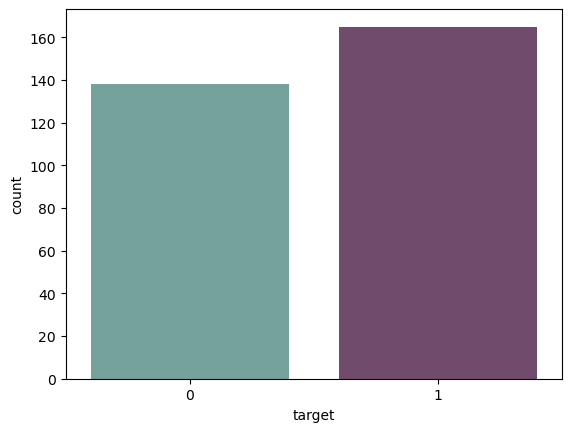

In [6]:
cols= ["#6daa9f","#774571"]
sns.countplot(x= df["target"], palette= cols)


There is just slight imbalance in the target.

In [30]:
#performing Chi square test to check association with the target (categorical)

cat_cols = ['sex','exang','ca','cp','fbs','restecg','slope','thal']
cat_list=[]
from scipy.stats import chi2_contingency

def check_cat_association(column):
    contingency_table = pd.crosstab(df[column], df['target'])
    # Perform the chi-square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    if p<0.05:
        cat_list.append(column)
    
for i in cat_cols:
    check_cat_association(i)
    
print('Columns that have associationwith the target variables are',cat_list)

Columns that have associationwith the target variables are ['sex', 'exang', 'ca', 'cp', 'restecg', 'slope', 'thal']


<Axes: >

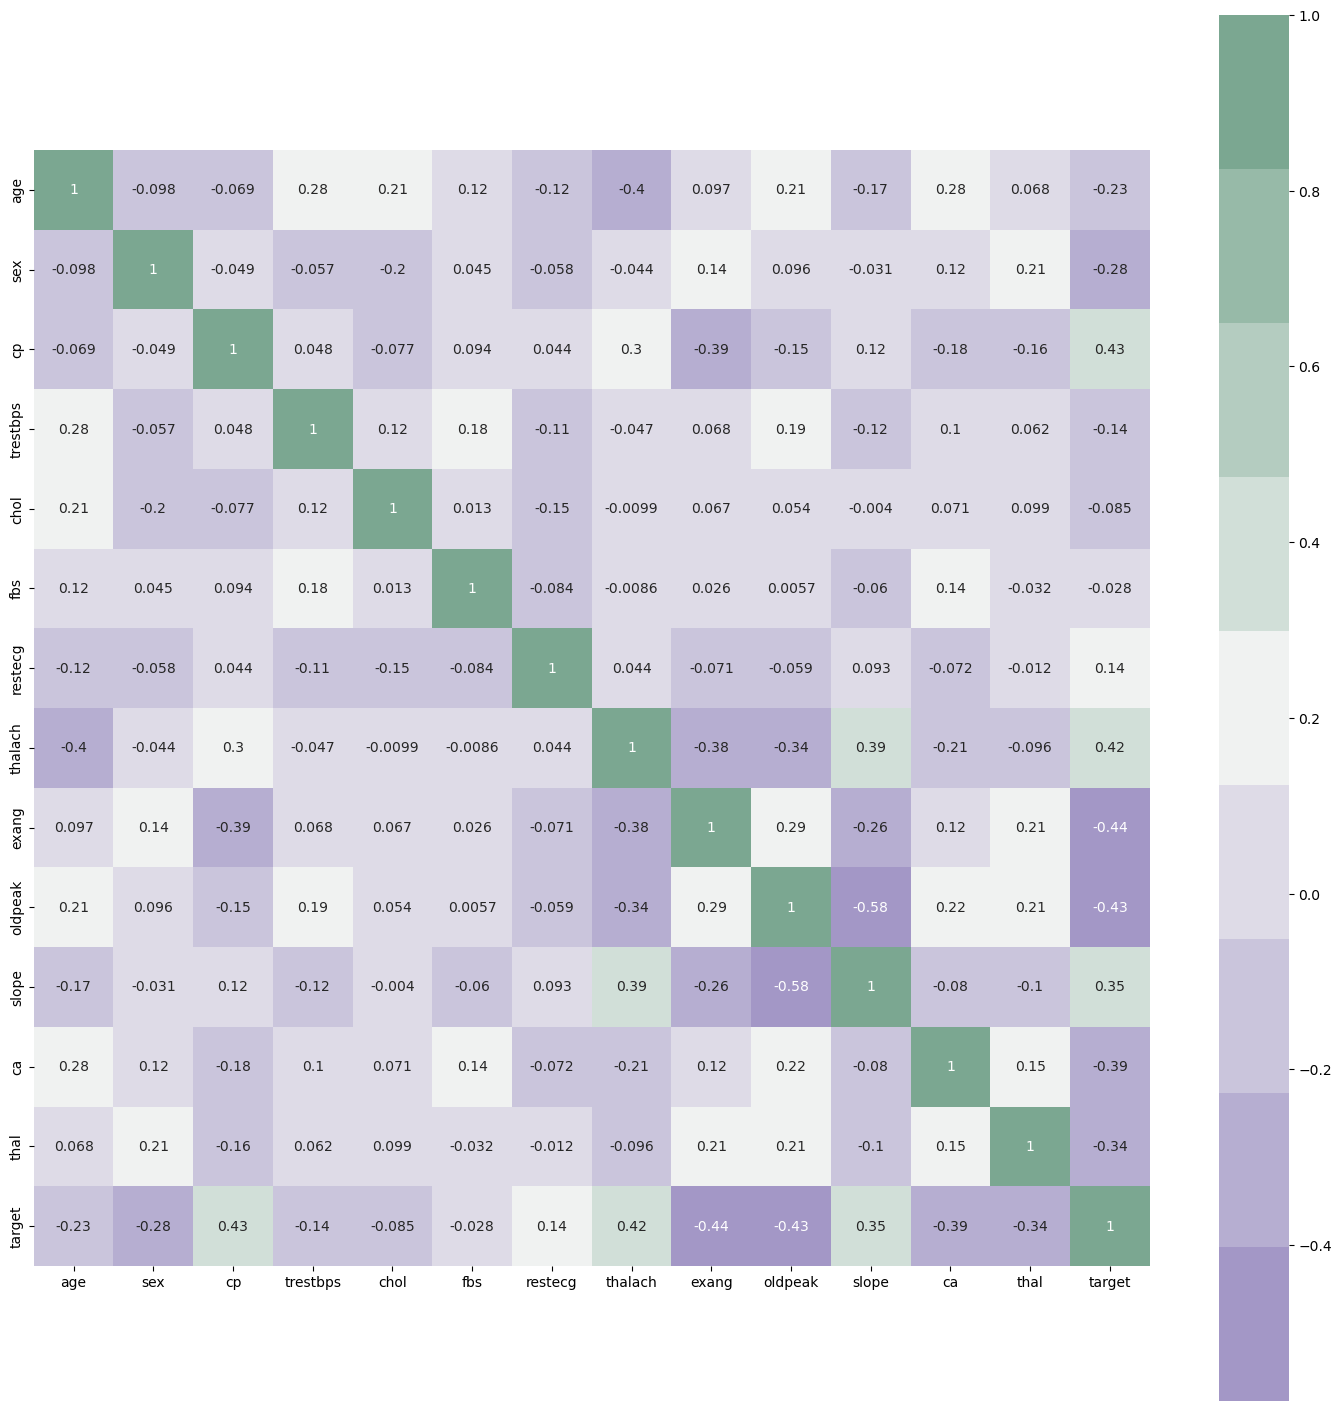

In [31]:
#Examaning a corelation matrix of all the features 
cmap = sns.diverging_palette(275,150, s=40, l=65, n=9)
corrmat = df.corr()
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap= cmap,annot=True, square=True)

Text(0.5, 1.0, 'Distribution Of Age')

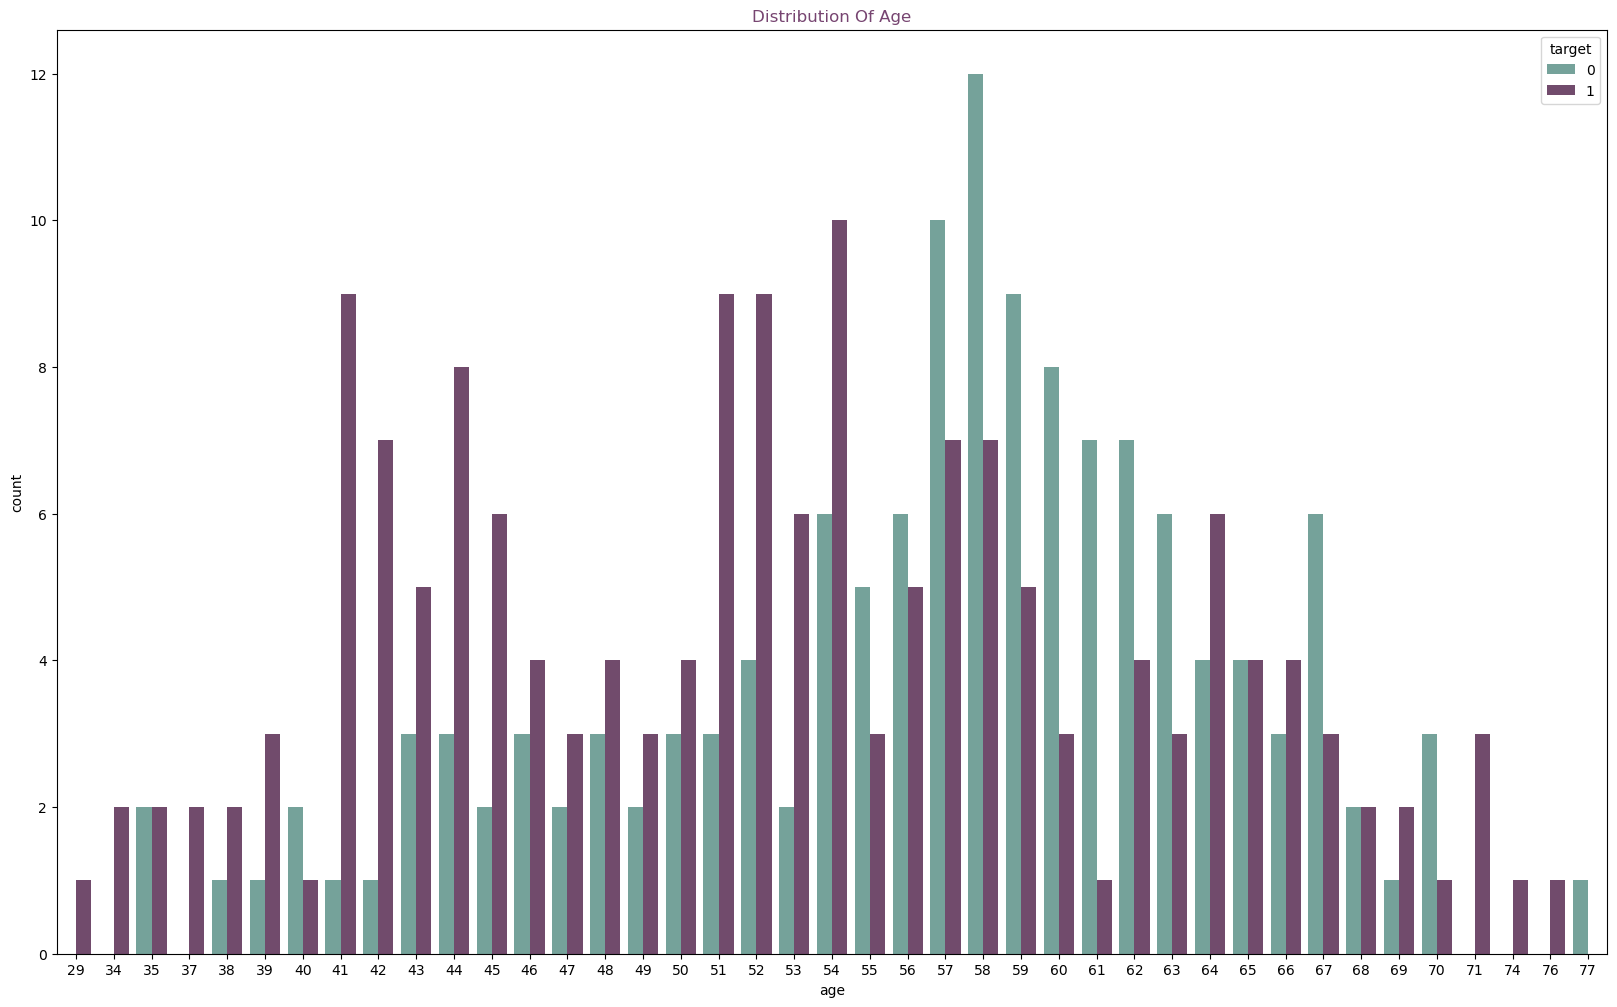

In [32]:
#Evaluating the age distribution
plt.figure(figsize=(20,12))
Days_of_week=sns.countplot(x=df['age'],data=df, hue ="target",palette = cols)
Days_of_week.set_title("Distribution Of Age", color="#774571")

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [44]:
#assigning values to features as X and target as y
X=df.drop(["target"],axis=1)
y=df["target"]

In [45]:
#Set up a standard scaler for the features
col_names = list(X.columns)
s_scaler = preprocessing.StandardScaler()
X_df= s_scaler.fit_transform(X)
X_df = pd.DataFrame(X_df, columns=col_names) 
X_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,4.690051e-17,1.001654,-2.797624,-0.757280,0.069886,0.731619,2.496240
sex,303.0,-1.407015e-16,1.001654,-1.468418,-1.468418,0.681005,0.681005,0.681005
cp,303.0,2.345026e-17,1.001654,-0.938515,-0.938515,0.032031,1.002577,1.973123
trestbps,303.0,-7.035077e-16,1.001654,-2.148802,-0.663867,-0.092738,0.478391,3.905165
chol,303.0,-1.113887e-16,1.001654,-2.324160,-0.681494,-0.121055,0.545674,6.140401
fbs,303.0,-2.345026e-17,1.001654,-0.417635,-0.417635,-0.417635,-0.417635,2.394438
restecg,303.0,1.465641e-16,1.001654,-1.005832,-1.005832,0.898962,0.898962,2.803756
thalach,303.0,-6.800574e-16,1.001654,-3.439267,-0.706111,0.146634,0.715131,2.289429
exang,303.0,-4.690051e-17,1.001654,-0.696631,-0.696631,-0.696631,1.435481,1.435481
oldpeak,303.0,2.345026e-17,1.001654,-0.896862,-0.896862,-0.206705,0.483451,4.451851


In [46]:
#spliting test and training sets
X_train, X_test, y_train,y_test = train_test_split(X_df,y,test_size=0.25,random_state=7)


In [47]:
early_stopping = callbacks.EarlyStopping(
 min_delta=0.001, # minimium amount of change to count as an improvement
 patience=20, # how many epochs to wait before stopping
 restore_best_weights=True)
# Initialising the NN
model = Sequential()
# layers
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 13))
#ReLU stands for Rectified Linear Unit. The main advantage of using the ReLU function over other activation functions is that it does not activate 
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
#The main reason why we use sigmoid function is because it exists between (0 to 1). Therefore, it is especially used for models where we have to pr
#from keras.optimizers import SGD
from tensorflow.keras.optimizers import SGD
# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# Train the ANN
history = model.fit(X_train, y_train, batch_size = 32, epochs = 500,callbacks=[early_stopping], validation_split=0.2)

Epoch 1/500
6/6 [==============================] - 2s 70ms/step - loss: 0.6930 - accuracy: 0.5635 - val_loss: 0.6934 - val_accuracy: 0.4565
Epoch 2/500
6/6 [==============================] - 0s 13ms/step - loss: 0.6924 - accuracy: 0.5912 - val_loss: 0.6936 - val_accuracy: 0.4565
Epoch 3/500
6/6 [==============================] - 0s 12ms/step - loss: 0.6921 - accuracy: 0.5912 - val_loss: 0.6938 - val_accuracy: 0.4565
Epoch 4/500
6/6 [==============================] - 0s 12ms/step - loss: 0.6916 - accuracy: 0.5912 - val_loss: 0.6940 - val_accuracy: 0.4565
Epoch 5/500
6/6 [==============================] - 0s 15ms/step - loss: 0.6913 - accuracy: 0.5912 - val_loss: 0.6943 - val_accuracy: 0.4565
Epoch 6/500
6/6 [==============================] - 0s 14ms/step - loss: 0.6908 - accuracy: 0.5912 - val_loss: 0.6944 - val_accuracy: 0.4565
Epoch 7/500
6/6 [==============================] - 0s 14ms/step - loss: 0.6903 - accuracy: 0.5912 - val_loss: 0.6945 - val_accuracy: 0.4565
Epoch 8/500
6/6 [===

6/6 [==============================] - 0s 12ms/step - loss: 0.4459 - accuracy: 0.8177 - val_loss: 0.5249 - val_accuracy: 0.8913
Epoch 60/500
6/6 [==============================] - 0s 12ms/step - loss: 0.4133 - accuracy: 0.8840 - val_loss: 0.5229 - val_accuracy: 0.8913
Epoch 61/500
6/6 [==============================] - 0s 13ms/step - loss: 0.4684 - accuracy: 0.8398 - val_loss: 0.5213 - val_accuracy: 0.8913
Epoch 62/500
6/6 [==============================] - 0s 17ms/step - loss: 0.4539 - accuracy: 0.8398 - val_loss: 0.5200 - val_accuracy: 0.8913
Epoch 63/500
6/6 [==============================] - 0s 15ms/step - loss: 0.4792 - accuracy: 0.8343 - val_loss: 0.5201 - val_accuracy: 0.8913
Epoch 64/500
6/6 [==============================] - 0s 16ms/step - loss: 0.4898 - accuracy: 0.8398 - val_loss: 0.5211 - val_accuracy: 0.8913
Epoch 65/500
6/6 [==============================] - 0s 16ms/step - loss: 0.4600 - accuracy: 0.8564 - val_loss: 0.5220 - val_accuracy: 0.8913
Epoch 66/500
6/6 [========

In [48]:

val_accuracy = np.mean(history.history['val_accuracy'])
print("\n%s: %.2f%%" % ('val_accuracy', val_accuracy*100))


val_accuracy: 72.17%


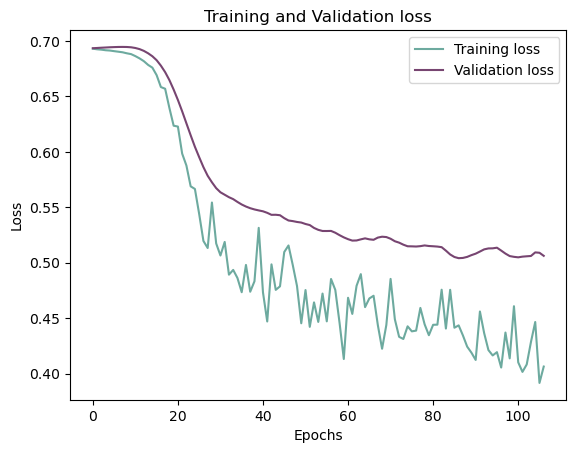

In [49]:
history_df = pd.DataFrame(history.history)
plt.plot(history_df.loc[:, ['loss']], "#6daa9f", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#774571", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")
plt.show()


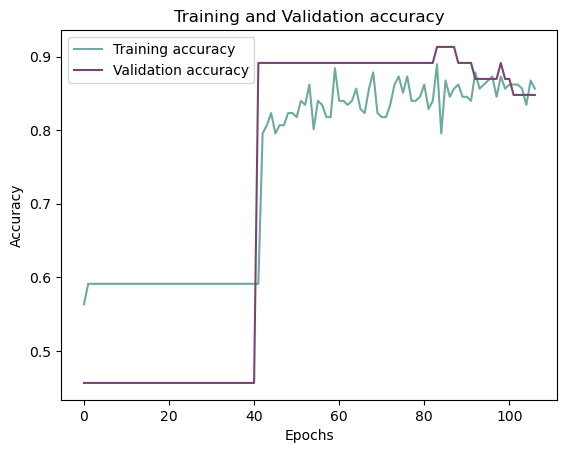

In [50]:
history_df = pd.DataFrame(history.history)
plt.plot(history_df.loc[:, ['accuracy']], "#6daa9f", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], "#774571", label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [51]:

# Predicting the test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
np.set_printoptions()


3/3 [==============================] - 0s 5ms/step


<Axes: >

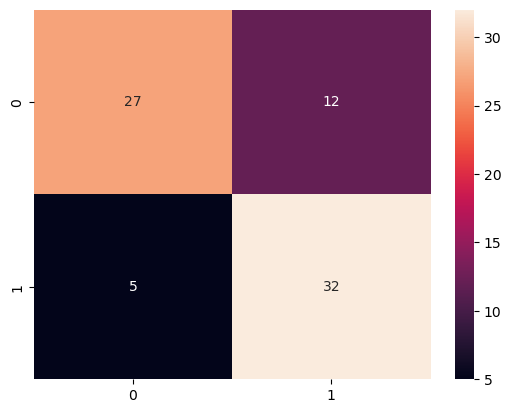

In [52]:

# confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix,annot=True)

In [53]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.84      0.69      0.76        39
           1       0.73      0.86      0.79        37

    accuracy                           0.78        76
   macro avg       0.79      0.78      0.78        76
weighted avg       0.79      0.78      0.77        76



In [54]:
# Accuracy score
accuracy_score(y_test, y_pred)


0.7763157894736842